# Most Commonly used Modules

## Pandas

Python has long been great for data munging and preparation, but less so for data analysis and modeling. 

Pandas helps fill this gap, enabling data analysis workflow in Python without having to switch to a more domain specific language like R.

* Pandas introduces the concept of DataFrame for manipulating data with indexing
* Reading / Writing data between in-memory and different formats (CSV / Excel, SQL databases)
* Handling of missing data: easily manipulate messy data into an orderly form
* Flexible reshaping and pivoting of data sets
* Label-based slicing, subsetting of large data sets
* Columns can be inserted and deleted from data structures for size mutability
* Merging and joining of data sets
* Handle Time series: 
    * Date range generation and frequency conversion, 
    * Moving window statistics
    * Moving window linear regressions
    * Date shifting and lagging




In [4]:
# import Pandas Module
import pandas as pd 


### DataFrames
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

#### Features of DataFrame
- Potentially columns are of different types
- Size – Mutable
- Labeled axes (rows and columns)
- Can Perform Arithmetic operations on rows and columns

In [ ]:
help(pd.DataFrame)

A pandas DataFrame can be created using various inputs like:

- Lists
- dict
- Series
- Numpy ndarrays
- Another DataFrames

Another way of creating a DataFrame:

##### Data Frames from Lists

In [5]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

# to merge two lists by the second dimetion you can use zip
BabyDataSet = list(zip(names,births))

In [6]:
BabyDataSet


[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [7]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print(df)

     Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973


# Dataframes from Dictionaries

In [10]:
df = pd.DataFrame({'births':births,
                    'names':names})
print(df)

   births    names
0     968      Bob
1     155  Jessica
2      77     Mary
3     578     John
4     973      Mel


##### DataFrames from Numpy Arrays

In [33]:
import numpy as np

exact_vector = np.arange(16) + np.random.rand()
round_vector = np.round(exact_vector)

data = np.vstack((exact_vector,round_vector))

data = np.transpose(data)
df = pd.DataFrame(data)
df

,0,1
0,0.951239,1.0
1,1.951239,2.0
2,2.951239,3.0
3,3.951239,4.0
4,4.951239,5.0
5,5.951239,6.0
6,6.951239,7.0
7,7.951239,8.0
8,8.951239,9.0
9,9.951239,10.0


array([ 0.85054781,  1.85054781,  2.85054781,  3.85054781,  4.85054781,
        5.85054781,  6.85054781,  7.85054781,  8.85054781,  9.85054781,
       10.85054781, 11.85054781, 12.85054781, 13.85054781, 14.85054781,
       15.85054781])

,0,1
0,0.850548,1.0
1,1.850548,2.0
2,2.850548,3.0
3,3.850548,4.0
4,4.850548,5.0
5,5.850548,6.0
6,6.850548,7.0
7,7.850548,8.0
8,8.850548,9.0
9,9.850548,10.0


In [34]:
# Ranaming Colums
df = df.rename(columns = {0:'Exact Numbers',
                          1:'Round Numbers'})

df['Error'] = (df['Exact Numbers']- df['Round Numbers'])/df['Round Numbers']

df.head(5)



,Exact Numbers,Round Numbers,Error
0,0.951239,1.0,-0.048761
1,1.951239,2.0,-0.024380
2,2.951239,3.0,-0.016254
3,3.951239,4.0,-0.012190
4,4.951239,5.0,-0.009752


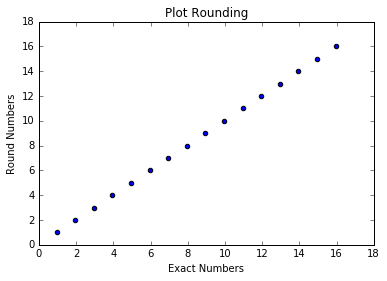

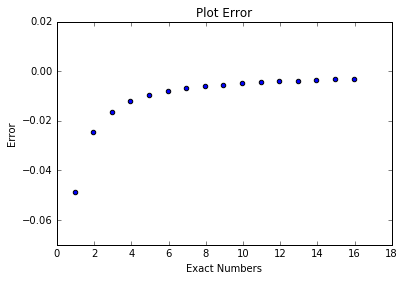

In [35]:
%matplotlib inline

df.plot.scatter(x ='Exact Numbers', y= 'Round Numbers', title = 'Plot Rounding')
df.plot.scatter(x ='Exact Numbers', y= 'Error', title = 'Plot Error')

In [20]:
# Alternatively it is possible to use the List property of storing Numbers and Strings
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

     Col1 Col2
Row1    1    2
Row2    3    4


## <span style="color:blue"> **Exercise** </span>

1. Create a DataFrame and visualize in a graph the two arrays below, using what you have learned untill now

(categporical x-axis data can be plotted with the kind='bar' argument)



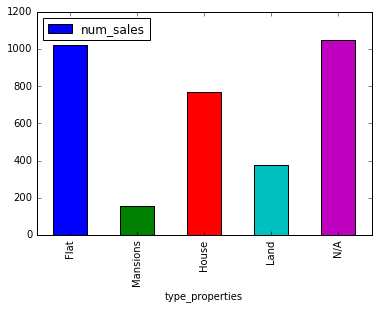

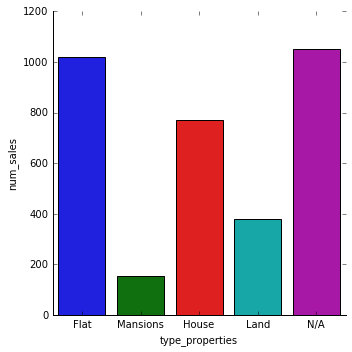

In [27]:
properties = ['Flat','Mansions','House','Land','N/A']
sales = [1021, 155, 770, 378, 1051]
df = pd.DataFrame({'type_properties': properties,
                  'num_sales' : sales})

#Result
DataSet = list(zip(properties,sales))
df_house = pd.DataFrame(data = DataSet, columns=['properties', 'sales'])

df.plot.bar(x='type_properties', y='num_sales')

import seaborn as sns
sns.catplot(x='type_properties', y='num_sales',kind="bar", data=df);


After you have created your DataFrame. You can use:
- `.shape` the shape property will give you the dimensions of your DataFrame
- `len()` & `.index` give you information on the height of your DataFrame




In [36]:
df.shape

(16, 3)

In [37]:
df.index

RangeIndex(start=0, stop=16, step=1)

In [38]:
len(df)

16

In [42]:
# Column Names
list(df.columns)

['Exact Numbers', 'Round Numbers', 'Error']

#### DateFrama Operations


#### Select Values in DataFrame

One of the most important part of operating with DataFrames is to be able to extract data from it.

In R, you use the [,] notation to access the data frame’s values. in Python Pandas, the most important functions are:

- `iloc`: select row based on an index `'0'`
- `loc`:  Select Data based on a column name `'Exact Numbers'`



In [45]:
# Select all the element of the first 
df.iloc[:,0]
#print(df.iloc[:,0])

print(df.loc[:,'Exact Numbers'])


0      0.951239
1      1.951239
2      2.951239
3      3.951239
4      4.951239
5      5.951239
6      6.951239
7      7.951239
8      8.951239
9      9.951239
10    10.951239
11    11.951239
12    12.951239
13    13.951239
14    14.951239
15    15.951239
Name: Exact Numbers, dtype: float64


In [46]:
import numpy as np

exact_vector = np.arange(16) + np.random.rand()
round_vector = np.round(exact_vector)

data = np.vstack((exact_vector,round_vector))

data = np.transpose(data)

df = pd.DataFrame(data)
# Ranaming Colums
df = df.rename(columns = {0:'Exact Numbers',
                          1:'Round Numbers'})

df['Error'] = (df['Exact Numbers']- df['Round Numbers'])/df['Round Numbers']

df.loc[df['Exact Numbers'] >10 ,'Exact Numbers']

print(df.loc[0:5,'Exact Numbers'])

0    0.327802
1    1.327802
2    2.327802
3    3.327802
4    4.327802
5    5.327802
Name: Exact Numbers, dtype: float64


In [53]:
df.loc[(df['Exact Numbers'] >10) &
       (df['Round Numbers'] >10)
       ,['Exact Numbers','Round Numbers']]

,Exact Numbers,Round Numbers
11,11.327802,11.0
12,12.327802,12.0
13,13.327802,13.0
14,14.327802,14.0
15,15.327802,15.0


##### Adding a new Column

A new column can be added by using `loc` and an operation

In [47]:
df.loc[:,'Rounding Difference'] = df.iloc[:,0]-df.iloc[:,1]

In [48]:
df.head(5)

,Exact Numbers,Round Numbers,Error,Rounding Difference
0,0.327802,0.0,inf,0.327802
1,1.327802,1.0,0.327802,0.327802
2,2.327802,2.0,0.163901,0.327802
3,3.327802,3.0,0.109267,0.327802
4,4.327802,4.0,0.081951,0.327802


##### Boolean Indexing

Usefull to filter values of a column based on conditions from another set of columns. 

For instance, we want to subset a dataframe boolean indexing can help here. 

You can use the following code:


In [54]:
sub_df = df.loc[(df['Exact Numbers']>10) & 
       (df['Round Numbers']>11),:]

print(sub_df)

    Exact Numbers  Round Numbers     Error  Rounding Difference
12      12.327802           12.0  0.027317             0.327802
13      13.327802           13.0  0.025216             0.327802
14      14.327802           14.0  0.023414             0.327802
15      15.327802           15.0  0.021853             0.327802


##### Removing a Column or a Row

In [55]:
# Choosing by Column name

df_1 = df.drop(['Error'], axis =1 )

,Exact Numbers,Round Numbers,Rounding Difference
0,0.327802,0.0,0.327802
1,1.327802,1.0,0.327802
2,2.327802,2.0,0.327802
3,3.327802,3.0,0.327802
4,4.327802,4.0,0.327802
5,5.327802,5.0,0.327802
6,6.327802,6.0,0.327802
7,7.327802,7.0,0.327802
8,8.327802,8.0,0.327802
9,9.327802,9.0,0.327802


In [ ]:
# Dropping a row by Index
df.drop([0,1,2])

##### DataFrame - `Where`  and nesting DataFrame Methods

The `where` in pandas has the same use as for Numpy. This conditional search tool is very powerfull if assiciated with other nestable Methods

the example below shows the combined use of 
 - `where`
 - `.dropna()`
 - `.loc`





In [56]:
# This will select rows based on the condition "<5" on Round Numbers
df.where(df['Round Numbers']<5)

,Exact Numbers,Round Numbers,Error,Rounding Difference
0,0.327802,0.0,inf,0.327802
1,1.327802,1.0,0.327802,0.327802
2,2.327802,2.0,0.163901,0.327802
3,3.327802,3.0,0.109267,0.327802
4,4.327802,4.0,0.081951,0.327802
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [59]:
# There are NaN we would want to eliminate
df.where(df['Error']>-0.01).dropna()

,Exact Numbers,Round Numbers,Error,Rounding Difference
0,0.327802,0.0,inf,0.327802
1,1.327802,1.0,0.327802,0.327802
2,2.327802,2.0,0.163901,0.327802
3,3.327802,3.0,0.109267,0.327802
4,4.327802,4.0,0.081951,0.327802
5,5.327802,5.0,0.065560,0.327802
6,6.327802,6.0,0.054634,0.327802
7,7.327802,7.0,0.046829,0.327802
8,8.327802,8.0,0.040975,0.327802
9,9.327802,9.0,0.036422,0.327802


In [58]:
# Now that also the NaN have been removed let's secelct only the Column we are interested in
df.where(df['Round Numbers']<5).dropna().loc[:,'Round Numbers']

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: Round Numbers, dtype: float64

## <span style="color:blue"> **Exercise** </span>

1. Create a new DataFrame with only data With Error > -0.01


#### How to iterate over Pandas DataFrame

Given the large number of Functions and ".methods" that exist for dataFrames in pandas, there are very few instances where one will need to iterate. 

This section gives an example on how to set this up by using:

 - `iterrows()`
 


In [ ]:
for index, row in df.iterrows() :
    print(row['Round Numbers'], row['Exact Numbers'])

### Read and Write DataFrames to Files

Pandas dataframes are designed to ease the access to files and external data bases like excel files  / csv file. 

Pandas is equipped with functions to write to files like:

 - `to_csv()`
 - `.XlsxWriter()` & `to_excel()`

and Read from Files:
- `read_csv()`
- `read_excel()`
- `read_table()`

Additionally, any form of inport with that take data and bring it into a `list` can be transformed easily into a dataframe. 



#### Read

Files can be read directly into a DataFrame which is the most convenient form of handling data.

In [ ]:
#folder_directory and file paths can be combined as seen in the previous sections

#folder_directory = r'C:\Users\meert.j\OneDrive - Procter and Gamble\PnG\trainings\python training1819\python-training-master\\python-training-master\Basic\\'
folder_directory = 'C:/Users/gabriele.a/Documents/Git Repository/PG_Python_Training/Current Training/NoteBooks/'

file_name = 'noisy-timeserie-data.csv'

file_path = folder_directory+file_name

df = pd.read_csv(file_path, header=0, sep=',')

df.iloc[0:5,0:3]

In [ ]:
#folder_directory and file paths can be combined as seen in the previous sections
#folder_directory = 'C:/Users/gabriele.a/Documents/Git Repository/PG_Python_Training/Current Training/NoteBooks/'

file_name = 'noisy-timeserie-data.xlsx'

file_path = folder_directory+file_name

# the Excel_Read is able to start reading from  specific row and Skim through the sheets
df = pd.read_excel(file_path, sheet_name='Sheet1',header=0, skiprows=None, convert_float=False)

df.iloc[0:5,0:3]

### Write

Data back to a file is similar to reading. with the expection of writing to excel which can be more tricky.

The simple case is writing `to_csv` files:

In [ ]:
#folder_directory = 'C:/Users/gabriele.a/Documents/Git Repository/PG_Python_Training/Current Training/NoteBooks/'
file_name = 'noisy-timeserie-data_and_tan.csv'
file_path = folder_directory+file_name

df.loc[:,'Noisy Tangent'] = df.loc[:,'Noisy Sine'] / df.loc[:,'Noisy Cosine']

df.to_csv(path_or_buf=file_path, 
          sep=',', 
          header = True, # This keeps the header in the csv file
          index= False)  # Index False removes the row numbers present in the Datatable

# for the full list of options in to_csv consult the help()

Although csv files are readily open by Excel for certain applications it might be usefull to save directly to an excel file

Saving to an excel file is slightly more complex, since you need first an Excel Writer Engine

Pandas writes Excel files using the Xlwt module for xls files and the Openpyxl or XlsxWriter modules for xlsx files.


In [ ]:
#folder_directory = 'C:/Users/gabriele.a/Documents/Git Repository/PG_Python_Training/Current Training/NoteBooks/'
file_name = 'noisy-timeserie-data_and_tan.xlsx'
file_path = folder_directory+file_name


df.loc[:,'Noisy Tangent'] = df.loc[:,'Noisy Sine'] / df.loc[:,'Noisy Cosine']

#print(df.iloc[:,0:5])

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(file_path, engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, 
            sheet_name='my_first_sheet',
            index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()
